This assignment has been done in group of 2. Following are group members
1. Zenab Bhinderwala  - 109897840
2. Pranavi venkata Changamma Meda - 111492602

In [1]:
#Importing the libraries to implement the functionalities on the data

import pandas as pd
import numpy as np
import sklearn as skl

In [2]:
#Reading the data from the properties 2017 csv file

prop_org_dataset = pd.read_csv("input\properties_2017.csv", low_memory=False)

In [3]:
#Replacing the naN values with zeros for easy calculations

prop_org_dataset.fillna(0, inplace=True)

In [4]:
#We don't need all the properties for predicting the log error or for any other functionalities. 
#So creating a smaller data frame for efficiency

prop_small_dataset = prop_org_dataset[["yearbuilt","bathroomcnt","regionidzip","structuretaxvaluedollarcnt","lotsizesquarefeet","finishedsquarefeet12","taxvaluedollarcnt","landtaxvaluedollarcnt","taxamount","bedroomcnt","regionidcity"]]

#### QUESTION 1 ######
#### Ranking the houses based on the desirability. Ranking the houses using a scoring function


In [5]:
# Calculating the Z Score using scipy library

from scipy.stats import zscore
df_zscore = prop_small_dataset
df_zscore = df_zscore.apply(zscore)
df_zscore.head()

,yearbuilt,bathroomcnt,regionidzip,structuretaxvaluedollarcnt,lotsizesquarefeet,finishedsquarefeet12,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,bedroomcnt,regionidcity
0,-7.801213,-2.050062,0.026769,-0.383752,0.273634,-1.45517,-0.539264,-0.544553,-0.556235,-2.424446,0.067989
1,-7.801213,-2.050062,0.026769,-0.383752,-0.069032,-1.45517,-0.505430,-0.487611,-0.556235,-2.424446,0.067989
2,0.105091,-2.050062,-0.006464,1.061974,0.178480,-1.45517,1.225695,1.058217,1.599222,-2.424446,0.344209
3,0.060696,-2.050062,0.038716,0.885556,-0.054609,-1.45517,0.905323,0.685922,0.952306,-2.424446,-0.432555
4,0.056660,-2.050062,0.042287,0.046786,-0.050452,-1.45517,0.002047,-0.040815,0.037041,-2.424446,-0.432555


In [6]:
# Assigning weights to all the zscore of desirable features

df_zscore['yearbuilt'] = df_zscore['yearbuilt'].apply(lambda x: x*10)
df_zscore['bathroomcnt'] = df_zscore['bathroomcnt'].apply(lambda x: x*5)
df_zscore['regionidzip'] = df_zscore['regionidzip'].apply(lambda x: x*8)
df_zscore['structuretaxvaluedollarcnt'] = df_zscore['structuretaxvaluedollarcnt'].apply(lambda x: x*10)
df_zscore['lotsizesquarefeet'] = df_zscore['lotsizesquarefeet'].apply(lambda x: x*7)
df_zscore['finishedsquarefeet12'] = df_zscore['finishedsquarefeet12'].apply(lambda x: x*10)
df_zscore['taxvaluedollarcnt'] = df_zscore['taxvaluedollarcnt'].apply(lambda x: x*8)
df_zscore['landtaxvaluedollarcnt'] = df_zscore['landtaxvaluedollarcnt'].apply(lambda x: x*6)
df_zscore['taxamount'] = df_zscore['taxamount'].apply(lambda x: x*7)
df_zscore['bedroomcnt'] = df_zscore['bedroomcnt'].apply(lambda x: x*6)
df_zscore['regionidcity'] = df_zscore['regionidcity'].apply(lambda x: x*6)

In [7]:
# Summing all zscores to get a rank for every row 

df_zscore['rank'] = df_zscore.sum(axis = 1)
df_zscore.head()

,yearbuilt,bathroomcnt,regionidzip,structuretaxvaluedollarcnt,lotsizesquarefeet,finishedsquarefeet12,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,bedroomcnt,regionidcity,rank
0,-78.012126,-10.250308,0.214150,-3.837520,1.915439,-14.551701,-4.314111,-3.267315,-3.893648,-14.546673,0.407935,-130.135879
1,-78.012126,-10.250308,0.214150,-3.837520,-0.483222,-14.551701,-4.043444,-2.925664,-3.893648,-14.546673,0.407935,-131.922221
2,1.050906,-10.250308,-0.051715,10.619745,1.249358,-14.551701,9.805558,6.349302,11.194555,-14.546673,2.065256,2.934283
3,0.606959,-10.250308,0.309729,8.855564,-0.382266,-14.551701,7.242584,4.115532,6.666144,-14.546673,-2.595327,-14.529764
4,0.566600,-10.250308,0.338293,0.467864,-0.353166,-14.551701,0.016375,-0.244892,0.259285,-14.546673,-2.595327,-40.893650


In [8]:
# Sorting the zscore in descending order of rank, highest 10 rank as most desirable and lowest 10 ranks as least desirable

df_zscore['parcelid'] = prop_org_dataset['parcelid']
df_zscore_sorted = df_zscore.sort_values(['rank'], ascending=False)['parcelid']
most_desirable  = list(df_zscore_sorted.values[:10])
least_desirable = list(df_zscore_sorted.values[-10:])
print ("Most Desirable 10 properties !!!!!!")
most_desirable

Most Desirable 10 properties !!!!!!


[167688009,
 11746970,
 14340985,
 11984395,
 11783635,
 10944745,
 11467277,
 11784354,
 11638223,
 11635852]

In [9]:
print ("Least Desirable 10 properties !!!!!!")
least_desirable

Least Desirable 10 properties !!!!!!


[13903095,
 17277895,
 11324895,
 10866295,
 11732695,
 13113496,
 13113296,
 13113096,
 11905696,
 12766630]

##### Scoring function ########

Scoring functions are used to rank or order items by sorting the scores.
In this project we are ranking the houses based on desirability. We have used the properties “yearbuilt”, "bathroomcnt", "structuretaxvaluedollarcnt", "lotsizesquarefeet", "finishedsquarefeet15", "taxvaluedollarcnt", "landtaxvaluedollarcnt","taxamount","bedroomcnt","regionidcity" to score the desirability of a house.

Scoring function used : Z SCORE function

The Z Score values are calculated as; Z = (xi - mean)/ standard variance. This normalizes the data to a uniform range. 
Now we have given weights to the properties based on their importance in choosing a house. Multiplied the values of each property with the weight and summing all the properties of a row would give a score for that function.
Sorting these values gave us the ten most desirable and least houses.

The parcel IDs of ten most desirable and ten least desirable houses are displayed above.


###### QUESTION 2 ########

Calculating the pairwise distance and finding the similarity between the houses based on properties.

In [20]:
#Calculating the euclidian distance using sklearn library

from sklearn.metrics.pairwise import euclidean_distances
dist_x = dist_y = prop_small_dataset[:15]
euc_dist = euclidean_distances(dist_x,dist_y)

In [12]:
x_labels = prop_org_dataset[['parcelid']][:15].values


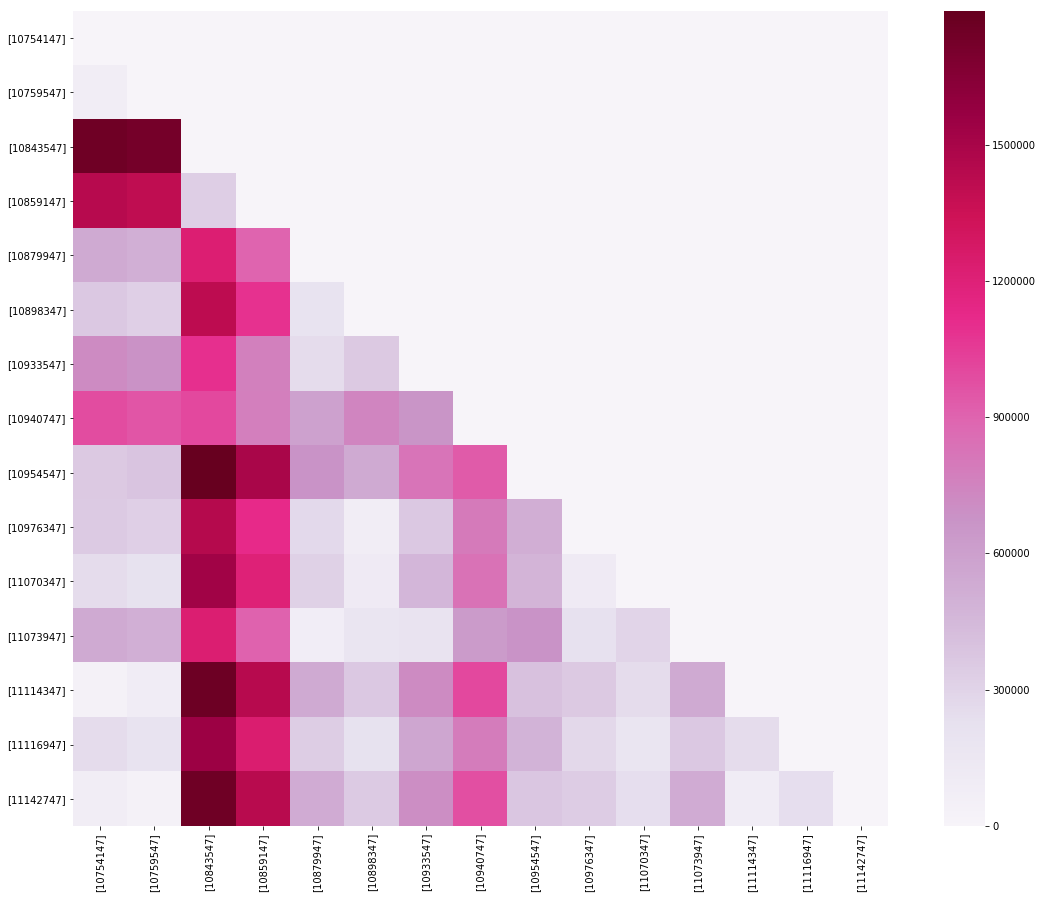

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
euc_dist = np.tril(euc_dist)
plt.figure(figsize=(20,15))
sns.heatmap(euc_dist,xticklabels=x_labels,yticklabels=x_labels,square=True,cmap='PuRd')

###### Pair Wise Distance function: #######

To find the similarity between two properties. Very similar properties will give a distance value close to zero. As the dissimilarity grows the distance value increases. This can be seen via clustering also. Similar pair of properties will fall into the same cluster with a less distance (close to zero) between them. Dissimilar properties fall into different clusters indicating more distance between them.

We used Euclidian Distance as a pair wise distance function.
Dist = sqrt((x1^2 – x2^2)+(y1^2 – y2^2))

We used a heat map to show how closely the properties are related.

In [26]:
prop_org_dataset.shape

(2985217, 58)

###### QUESTION 3 ########

CLUSTERING

In [36]:
from sklearn import cluster
euc_dist_all = euclidean_distances(prop_small_dataset[:10000],prop_small_dataset[:10000])

In [40]:
geo_df = prop_org_dataset[['latitude', 'longitude']]
geo_df=geo_df[:10000]
geo_df.loc[:,'longitude']=geo_df.loc[:,'longitude'].apply(lambda x: x/1e6)
geo_df.loc[:,'latitude']= geo_df.loc[:,'latitude'].apply(lambda x: x/1e6)
geo_df.loc[geo_df.latitude == 0, 'latitude'] = 34.088537
geo_df.loc[geo_df.longitude == 0, 'longitude'] = -118.249923
from sklearn.cluster import MiniBatchKMeans
import folium
kmeans1 = MiniBatchKMeans(n_clusters=10, batch_size=1000).fit(geo_df[['latitude','longitude']])
geo_df.loc[:, 'label'] = kmeans1.labels_
map_2 = folium.Map(location=[34.088537, -118.249923],
                   zoom_start=9)
for label in kmeans1.cluster_centers_:
    folium.Marker(location=[label][0]).add_to(map_2)
map_2

#The above map shows the centre of ten clusters given the latitude and longitude

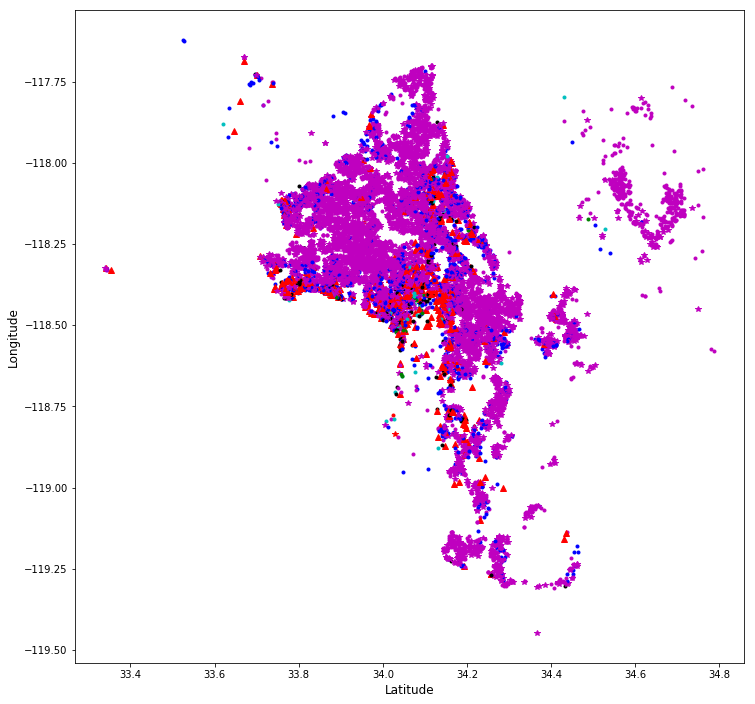

In [44]:
#Clustering the data using kmeans clustering from sklearn library

from random import randint
from sklearn.cluster import KMeans
colors = []

for i in range(10):
    colors.append('%06X' % randint(0, 0xFFFFFF))
ptsymb = np.array(['b.','r.','m.','g.','c.','k.','b*','r*','m*','r^']);
kmeans = KMeans(n_clusters=10, random_state=0).fit(euc_dist_all)
geo_df.loc[:,'labels']=kmeans.labels_
plt.figure(figsize=(12,12))
for index,row in geo_df.iterrows():
    i = int(row['labels'])
    plt.plot(row['latitude'],row['longitude'],ptsymb[i])
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

###### CLUSTERING #######

We used our distance function from previous step and clustered the properties. K-means clustering algorithm has been used to cluster the data. We have divided the 3 million data into 10 clusters.
All the houses with similar properties will be clustered into one cluster.

We used a scatter plot over map to show this. All the houses are plotted using the latitude and longitude.
The houses under same cluster are coloured same.

###### QUESTION 4 #######

EXTERNAL DATA

In [45]:
############# External Data #####################################

crime_dataset = pd.read_csv("input\crimes_2015.csv", low_memory=False)

In [46]:
crime_dataset.head()

,ID,City,Assault,Robbery,Homicide,Burglary,Auto Theft,Larceny,Population
0,1,AGOURA HILLS,17.9,31.2,0.0,83.8,24.4,54.2,20970
1,2,ALHAMBRA,43.6,93.6,27.8,75.9,113.7,85.9,86175
2,3,ARCADIA,24.0,57.6,40.8,115.4,50.6,79.6,58694
3,4,ARTESIA,143.8,192.6,0.0,124.9,303.5,79.6,16988
4,5,AZUSA,103.6,108.1,96.8,100.6,184.2,83.1,49431


In [47]:
crime_dataset['CrimeRate'] = crime_dataset[['Assault','Robbery','Homicide','Burglary','Auto Theft','Larceny']].mean(axis =1).round(2)

In [48]:
crime_dataset.head()

,ID,City,Assault,Robbery,Homicide,Burglary,Auto Theft,Larceny,Population,CrimeRate
0,1,AGOURA HILLS,17.9,31.2,0.0,83.8,24.4,54.2,20970,35.25
1,2,ALHAMBRA,43.6,93.6,27.8,75.9,113.7,85.9,86175,73.42
2,3,ARCADIA,24.0,57.6,40.8,115.4,50.6,79.6,58694,61.33
3,4,ARTESIA,143.8,192.6,0.0,124.9,303.5,79.6,16988,140.73
4,5,AZUSA,103.6,108.1,96.8,100.6,184.2,83.1,49431,112.73


In [49]:
## Geopy and US Zipcode APIs for getting the geo location and zipcode of the location

from geopy.geocoders import Nominatim
geolocator = Nominatim()
from uszipcode import ZipcodeSearchEngine
search = ZipcodeSearchEngine()

In [50]:
for  index,row in crime_dataset.iterrows():
    loc = ' '.join([row['City'],'CALIFORNIA United States of America'])
    location = geolocator.geocode(loc)
    if location :
        crime_dataset.ix[index,'latitude'] = location.latitude * 1000000
        crime_dataset.ix[index,'longitude']=location.longitude * 1000000
        zipcode = search.by_coordinate(location.latitude, location.longitude,returns=1).pop()['Zipcode']
        crime_dataset.ix[index,'ZipCode']=zipcode

C:\Users\mazsy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [67]:
crime_dataset.loc[crime_dataset.City== 'SAN MARINO','ZipCode']=int(91108)
crime_dataset.head()

,ID,City,Assault,Robbery,Homicide,Burglary,Auto Theft,Larceny,Population,CrimeRate,latitude,longitude,ZipCode
0,1,AGOURA HILLS,17.9,31.2,0.0,83.8,24.4,54.2,20970,35.25,34136394.5,-118774534.8,91301
1,2,ALHAMBRA,43.6,93.6,27.8,75.9,113.7,85.9,86175,73.42,34093042.0,-118127060.0,91801
2,3,ARCADIA,24.0,57.6,40.8,115.4,50.6,79.6,58694,61.33,34136207.5,-118040149.7,91007
3,4,ARTESIA,143.8,192.6,0.0,124.9,303.5,79.6,16988,140.73,33869019.7,-118079619.5,90701
4,5,AZUSA,103.6,108.1,96.8,100.6,184.2,83.1,49431,112.73,34133875.1,-117905604.6,91010


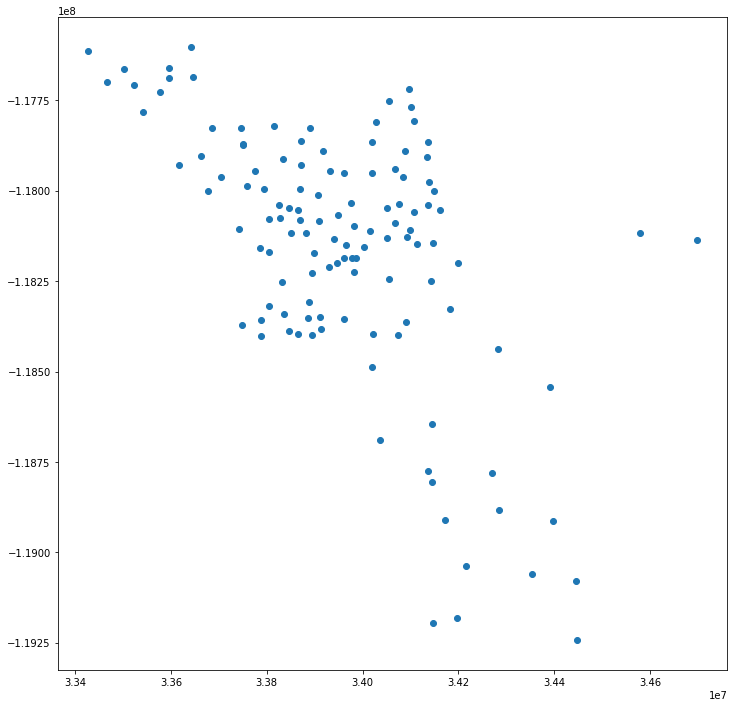

In [52]:
# Plotting the locations of available crime rates 

plt.figure(figsize = (12,12))
plt.scatter(x='latitude',y='longitude',data=crime_dataset)

In [66]:
crime_dataset.to_csv("input/crime_sample.csv", index=False)

In [54]:
train_dataset = pd.read_csv("input/train_2017.csv", low_memory=False)

In [55]:
train_dataset.shape
prop_org_dataset.shape

(2985217, 58)

In [56]:
#### Fill in region id for missing ones############

prop_org_dataset.loc[prop_org_dataset.regionidzip==0, 'regionidzip']=96001
zillow_zip_dataset=pd.read_csv("input/zillow_zipcodes.csv",low_memory=False)
zillow_zip_dataset.shape

(999, 7)

In [57]:
#Merging the actual zipcodes with the properties file

from merge_closest import merge_closest
prop_org_dataset=merge_closest(prop_org_dataset,zillow_zip_dataset,'regionidzip','id', include_cols='ZipCode')

In [58]:
prop_org_dataset.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,ZipCode
0,10754147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,9.0,2016.0,9.0,0.00,0,0.0,0.0,91302
1,10759547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,27516.0,2015.0,27516.0,0.00,0,0.0,0.0,91302
2,10843547,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0,660680.0,1434941.0,2016.0,774261.0,20800.37,0,0.0,0.0,90230
3,10859147,0.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,0.0,...,0,580059.0,1174475.0,2016.0,594416.0,14557.57,0,0.0,0.0,91423
4,10879947,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0,196751.0,440101.0,2016.0,243350.0,5725.17,0,0.0,0.0,91605


In [70]:
crime_dataset['ZipCode']=pd.to_numeric(crime_dataset['ZipCode']).astype(int)
crime_dataset.dtypes

ID              int64
City           object
Assault       float64
Robbery       float64
Homicide      float64
Burglary      float64
Auto Theft    float64
Larceny       float64
Population      int64
CrimeRate     float64
latitude      float64
longitude     float64
ZipCode         int32
dtype: object

In [71]:
######## Merging the properties file with crime dataset ####################

external_merged=merge_closest(prop_org_dataset,crime_dataset,'ZipCode','ZipCode',include_cols='CrimeRate')

In [72]:
external_merged.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,ZipCode,CrimeRate
0,10754147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,2016.0,9.0,0.00,0,0.0,0.0,91302,26.88
1,10759547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,27516.0,2015.0,27516.0,0.00,0,0.0,0.0,91302,26.88
2,10843547,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,660680.0,1434941.0,2016.0,774261.0,20800.37,0,0.0,0.0,90230,249.23
3,10859147,0.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,0.0,...,580059.0,1174475.0,2016.0,594416.0,14557.57,0,0.0,0.0,91423,45.80
4,10879947,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,196751.0,440101.0,2016.0,243350.0,5725.17,0,0.0,0.0,91605,63.53


###### EXTERNAL DATA #######

We used crime data as our external data set. 

We found a crime report for entire Southern California for this year 2015.

http://ilssc.soceco.uci.edu/files/2017/02/ILSSC_SoCal_Crime_Report_2015.pdf

This report included various statistics regarding the crimes in Southern California broken down to the level of counties and cities further. For every city in the county the different crime rates were analysed based on the population.

We collected the data for Los Angeles, Orange and Ventura counties from this report. Assuming  that there is not much change in the crime rate in 2 years, we used the data of this report which was an analysis for the year 2015.
Mapping the external data to properties file and training dataset.


We used the geopy API by google to get the geo location of the cities( of the three counties) for the crime rate data. Using the geo location we got the zip codes for all the cities. We used US zipcode api to get the zip codes based on location.
Correcting the zipcodes in properties file.

The properties file doesnot contain the correct zip codes but the Kaggle website has the mapping to the actual zipcodes. We used the Kaggle API to get the region related details and replaced the zipcodes in properties files with the correct ones.

Now we compared the zip codes from properties file and crime data file and added the crime data to the properties file. 



In [73]:
################## Cleaning Data####################
## As lot of data missing, we replaced the missing data with mean and mode values of the respective columns.

bdc_mode = int(external_merged["bedroomcnt"].mode())
external_merged.loc[external_merged.bedroomcnt == 0, 'bedroomcnt'] = bdc_mode

ns_mode = int(external_merged["numberofstories"].mode())
external_merged.loc[external_merged.numberofstories == 0, 'numberofstories'] = ns_mode

rn_mode = int(external_merged["regionidneighborhood"].mode())
external_merged.loc[external_merged.regionidneighborhood == 0, 'regionidneighborhood'] = rn_mode

uc_mode = int(external_merged["unitcnt"].mode())
external_merged.loc[external_merged.unitcnt == 0, 'unitcnt'] = uc_mode

plt_mode = int(external_merged["propertylandusetypeid"].mode())
external_merged.loc[external_merged.propertylandusetypeid == 0, 'propertylandusetypeid'] = plt_mode

btc_mode = int(external_merged["bathroomcnt"].mode())
external_merged.loc[external_merged.bathroomcnt == 0, 'bathroomcnt'] = btc_mode

tv_mean = int(external_merged["taxvaluedollarcnt"].mean())
external_merged.loc[external_merged.taxvaluedollarcnt == 0, 'taxvaluedollarcnt'] = tv_mean

cfs_mean = int(external_merged["calculatedfinishedsquarefeet"].mean())
external_merged.loc[external_merged.calculatedfinishedsquarefeet == 0, 'calculatedfinishedsquarefeet'] = cfs_mean

svc_mean = int(external_merged["structuretaxvaluedollarcnt"].mean())
external_merged.loc[external_merged.structuretaxvaluedollarcnt == 0, 'structuretaxvaluedollarcnt'] = svc_mean

lss_mean = int(external_merged["lotsizesquarefeet"].mean())
external_merged.loc[external_merged.lotsizesquarefeet == 0, 'lotsizesquarefeet'] = lss_mean

fss_mean = int(external_merged["finishedsquarefeet12"].mean())
external_merged.loc[external_merged.finishedsquarefeet12 == 0, 'finishedsquarefeet12'] = fss_mean

fss2_mean = int(external_merged["finishedsquarefeet15"].mean())
external_merged.loc[external_merged.finishedsquarefeet15 == 0, 'finishedsquarefeet15'] = fss2_mean

ltv_mean = int(external_merged["landtaxvaluedollarcnt"].mean())
external_merged.loc[external_merged.landtaxvaluedollarcnt == 0, 'landtaxvaluedollarcnt'] = ltv_mean

ta_mean = int(external_merged["taxamount"].mean())
external_merged.loc[external_merged.taxamount == 0, 'taxamount'] = ta_mean

        
desred_decimals = 2    
external_merged['CrimeRate'] =  external_merged['CrimeRate'].apply(lambda x: round(x,desred_decimals))
external_merged.head()


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,ZipCode,CrimeRate
0,10754147,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,...,175370.0,9.0,2016.0,9.0,5367.00,0,0.0,0.0,91302,26.88
1,10759547,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,...,175370.0,27516.0,2015.0,27516.0,5367.00,0,0.0,0.0,91302,26.88
2,10843547,0.0,0.0,0.0,2.0,3.0,5.0,0.0,0.0,0.0,...,660680.0,1434941.0,2016.0,774261.0,20800.37,0,0.0,0.0,90230,249.23
3,10859147,0.0,0.0,0.0,2.0,3.0,3.0,6.0,0.0,0.0,...,580059.0,1174475.0,2016.0,594416.0,14557.57,0,0.0,0.0,91423,45.80
4,10879947,0.0,0.0,0.0,2.0,3.0,4.0,0.0,0.0,0.0,...,196751.0,440101.0,2016.0,243350.0,5725.17,0,0.0,0.0,91605,63.53


In [75]:
############ Merging the properties file with Train Dataset ###########
external_merged_train=external_merged.merge(train_dataset,on='parcelid')
external_merged_train.shape

(77613, 62)

###### QUESTION 5 #######

###### PREDICTION MODEL ######

In [76]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#We will take the best features from the properties based on the co relation graphs i.e heat map and bar plot plotted above
train = external_merged_train.copy()
train = train.filter(['calculatedfinishedsquarefeet','latitude','longitude','CrimeRate','ZipCode','propertylandusetypeid',
                      'finishedsquarefeet12','taxvaluedollarcnt','yearbuilt','taxamount','lotsizesquarefeet'
                      ,'structuretaxvaluedollarcnt'])

train.fillna(0, inplace=True)
# Taking train dataset as 89275 rows and remaining 1000 rows are test dataset
train_Y = external_merged_train[['logerror']][:70000]
train_X = train[:70000]
test_X = train[70000:]

test_Y = external_merged_train[['logerror']][70000:]

In [77]:
#### LINEAR REGRESSION for predicting log error

linear_reg=linear_model.LinearRegression()

linear_reg.fit(train_X,train_Y)
test_Y_predict=linear_reg.predict(test_X)

# The coefficients
print('Coefficients: \n', linear_reg.coef_)
# The mean squared error
print("Mean squared error: %f"
      % mean_squared_error(test_Y, test_Y_predict))
# Explained variance score
print('Variance score: %f' % r2_score(test_Y, test_Y_predict))

#print ('Score : %f' % linear_reg.score(test_Y,test_Y_predict))


Coefficients: 
 [[  9.97673381e-07  -6.11190236e-09   5.37498740e-09   1.47647992e-05
    1.23177724e-06  -9.93479590e-05   1.39986182e-05   1.46655889e-08
   -1.06576794e-05  -1.72188496e-06   2.51979495e-08  -2.23753731e-08]]
Mean squared error: 0.024798
Variance score: -0.202351


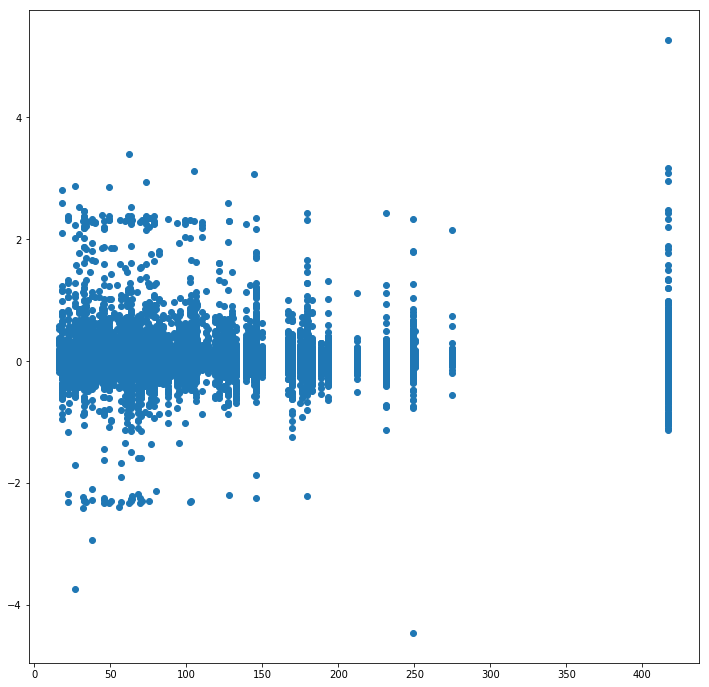

In [78]:
plt.figure(figsize = (12,12))
plt.scatter(external_merged_train.CrimeRate,external_merged_train.logerror)

###### above graph shoes the co relatioon of crime rate with log error


In [82]:
train_full_Y = external_merged_train[['logerror']]
linear_reg.fit(train,train_full_Y)
external_merged.fillna(0,inplace=True)
external_merge_sample =  external_merged.filter(['calculatedfinishedsquarefeet','latitude','longitude','CrimeRate','ZipCode','propertylandusetypeid',
                      'finishedsquarefeet12','taxvaluedollarcnt','yearbuilt','taxamount','lotsizesquarefeet'
                      ,'structuretaxvaluedollarcnt'])
sample_logerror=linear_reg.predict(external_merge_sample)

In [83]:
sample_logerror.shape

(2985217, 1)

In [84]:
######### Question 5. Predicting Sample Values ########################################

# Reading the sample file
sample_df=pd.read_csv("input/sample_submission.csv" ,low_memory=False)
sample_df.shape

(2985217, 7)

In [85]:
# Sample_df : dataframe containing the log errors for 2016 and 2017 stored in sample_submission.csv with parcel IDs
# these log errors were predicted using the trainning data onoly train_2017 file

sample_df['201610']=sample_logerror
sample_df['201611']=sample_logerror
sample_df['201612']=sample_logerror
sample_df['201710']=sample_logerror
sample_df['201711']=sample_logerror
sample_df['201712']=sample_logerror

sample_df.to_csv("input/sample_submission.csv", index=False)

In [86]:
############ Merging with both the Train Dataset ###########
# We merged both training data of log errors from train_2016 and train_2017 with the properties file and ran the linear regression 

train_2016 = pd.read_csv("input/train_2016_v2.csv", low_memory=False)
train_2017 = pd.read_csv("input/train_2017.csv", low_memory=False)
train_2016_2017=pd.concat([train_2016,train_2017])
external_merged_train_v3=external_merged.merge(train_2016_2017,on='parcelid')
external_merged_train_v3.shape

(167888, 62)

In [87]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#We will take the best features from the properties based on the co relation graphs i.e heat map and bar plot plotted above
train_v3 = external_merged_train_v3.copy()
train_v3 = train_v3.filter(['calculatedfinishedsquarefeet','latitude','longitude','CrimeRate','propertylandusetypeid',
                      'finishedsquarefeet12','lotsizesquarefeet','bedroomcnt','bathroomcnt','regionidzip'
                      ,'structuretaxvaluedollarcnt','regionidcity','numberofstories','unitcnt','fips','taxdelinquencyyear'])

train_v3.fillna(0, inplace=True)
# Taking train dataset as 89275 rows and remaining 1000 rows are test dataset
train_Y_v3 = external_merged_train_v3[['logerror']][:160000]
train_X_v3 = train_v3[:160000]
test_X_v3 = train_v3[160000:]
test_Y_v3 = external_merged_train_v3[['logerror']][160000:]

In [88]:
linear_reg_v3=linear_model.LinearRegression()

linear_reg_v3.fit(train_X_v3,train_Y_v3)
test_Y_predict_v3=linear_reg_v3.predict(test_X_v3)

# The coefficients
print('Coefficients: \n', linear_reg_v3.coef_)
# The mean squared error
print("Mean squared error: %f"
      % mean_squared_error(test_Y_v3, test_Y_predict_v3))
# Explained variance score
print('Variance score: %f' % r2_score(test_Y_v3, test_Y_predict_v3))


Coefficients: 
 [[  3.49988894e-06  -4.95774769e-10   4.22455056e-09  -4.01391197e-07
    2.16095704e-04   9.76600569e-06   1.79279675e-08   1.58527932e-03
   -1.87831941e-03  -2.78145220e-07  -2.72585597e-08   1.92217221e-09
   -1.22202675e-03  -1.55271064e-04   7.93085825e-05   1.24776630e-03]]
Mean squared error: 0.019996
Variance score: -0.004781


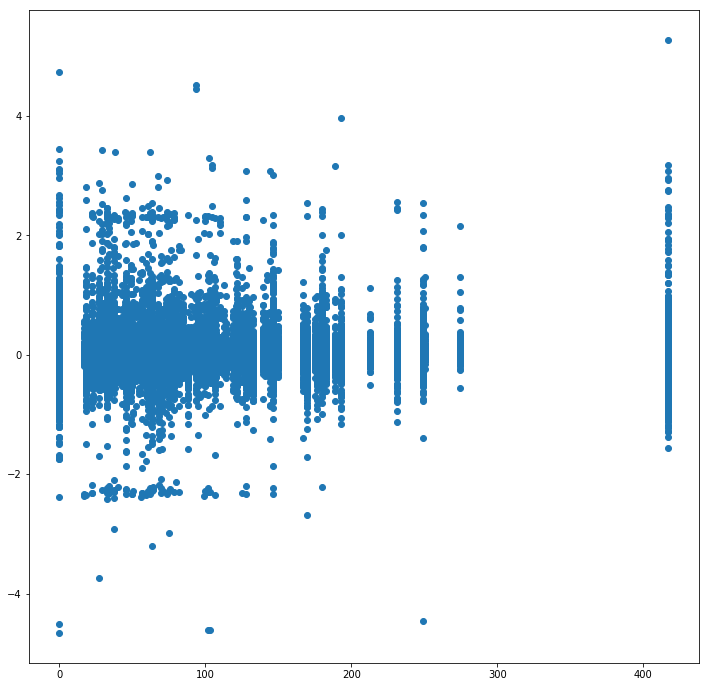

In [90]:
plt.figure(figsize = (12,12))
plt.scatter(external_merged_train_v3.CrimeRate,external_merged_train_v3.logerror)

###### above graph shows the co relation of crime rate with log error ( using training data from 2016 and 2017 )

In [91]:
#Both the above plots satisfy the high corelation of these features with the log error

train_full_Y_v3 = external_merged_train_v3[['logerror']]
linear_reg_v3.fit(train_v3,train_full_Y_v3)
external_merge_sample_v3 =  external_merged.filter(['calculatedfinishedsquarefeet','latitude','longitude','CrimeRate','propertylandusetypeid',
                      'finishedsquarefeet12','lotsizesquarefeet','bedroomcnt','bathroomcnt','regionidzip'
                      ,'structuretaxvaluedollarcnt','regionidcity','numberofstories','unitcnt','fips','taxdelinquencyyear'])
sample_logerror_v3=linear_reg_v3.predict(external_merge_sample_v3)

In [92]:
# sample_df : data frame containing the log errors predicted. 
#These were predicted using the training data from train_2016 and train_2017

sample_df['201610']=sample_logerror_v3
sample_df['201611']=sample_logerror_v3
sample_df['201612']=sample_logerror_v3
sample_df['201710']=sample_logerror_v3
sample_df['201711']=sample_logerror_v3
sample_df['201712']=sample_logerror_v3

sample_df.to_csv("input/sample_submission_3.0.csv", index=False)

Prediction model

Data used for training

 The linear regression model has been used to predict the log error.We ran the linear regression twice.
 Features/properties used in the training data : Latitude, longitude, crime rate, structured tax value dollar count, number of stories, unit count, finished square feet12, lot size square feet, fips, bed room count , zipcode, calculated finished square feet, property land type use id, bathroom count.

1. Using training data only from train_2017
Mean squared error :0.024

2. Using training data from train_2016 and train_2017
Mean squared error : 0.019

We used the properties file_2017 as it contains the updated data about the properties.
The training files 2016,2017 which contained the log error values were combined and merged with properties file to use as training data.

We can see that linear rergression performed better when the training data was more (i.e, whn both the trai files from 2016 and 2017 were combined)

The score obtained on Kaggle Zillow : 0.065
Rank : 2758


###### Prediction Model 2 #######
###### Random forests #######

Apart from linear regression we also used Random forest regrerssor to predict the log errors 

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

train_v4 = external_merged_train_v3.copy()
# We will drop the features which had higher frequency of missing values along with the columns of train df for the test df
train_v4 = train_v4.filter(['calculatedfinishedsquarefeet','latitude','longitude','CrimeRate','propertylandusetypeid',
                      'finishedsquarefeet12','lotsizesquarefeet','bedroomcnt','bathroomcnt'
                      ,'structuretaxvaluedollarcnt','regionidcity','numberofstories','unitcnt','fips'])

train_X_v4 = train_v4[:160000]
train_Y_v4= list(external_merged_train_v3['logerror'].values[:160000])
test_X_v4 = train_v4[160000:]
test_Y_v4 = external_merged_train_v3['logerror'].values[160000:]
reg = RandomForestRegressor(n_jobs=3, random_state=0)
reg.fit(train_X_v4,train_Y_v4)
#predicting the log error values
test_Y_reg = reg.predict(test_X_v4)
# The coefficients
print('Coefficients: \n', reg.feature_importances_)
# The mean squared error
print("Mean squared error: %f"
      % mean_squared_error(test_Y_v4, test_Y_reg))
# Explained variance score
print('Variance score: %f' % r2_score(test_Y_v4, test_Y_reg))


Coefficients: 
 [ 0.09330529  0.16434759  0.15752856  0.03959675  0.01097257  0.0839246
  0.13992948  0.03203906  0.02506028  0.20227553  0.03731753  0.00835401
  0.00325212  0.00209664]
Mean squared error: 0.022981
Variance score: -0.154764


In [97]:
# Predicting log error for all the samples using Random Regressor
train_full_Y_v4 = external_merged_train_v3[['logerror']]
reg.fit(train_v4,train_full_Y_v4)
external_merge_sample_v4 =  external_merged.filter(['calculatedfinishedsquarefeet','latitude','longitude','CrimeRate','propertylandusetypeid',
                      'finishedsquarefeet12','lotsizesquarefeet','bedroomcnt','bathroomcnt'
                      ,'structuretaxvaluedollarcnt','regionidcity','numberofstories','unitcnt','fips'])
sample_logerror_v4=reg.predict(external_merge_sample_v4)

C:\Users\mazsy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [98]:
#sample_submissio_4.1 contains the log error predicted using the random forest regressor

sample_df['201610']=sample_logerror_v4
sample_df['201611']=sample_logerror_v4
sample_df['201612']=sample_logerror_v4
sample_df['201710']=sample_logerror_v4
sample_df['201711']=sample_logerror_v4
sample_df['201712']=sample_logerror_v4

sample_df.to_csv("input/sample_submission_4.1.csv", index=False)

In [94]:
### K Nearest Neighbour Model ##################
# Will explore K nearesrt Neighbour model , as its most likely houses of similar types will be sold at similar prices , hence hoping the log error
# is predicted correctly

from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=500)

train_v5= external_merged_train_v3.copy()
# We will drop the features which had higher frequency of missing values along with the columns of train df for the test df
train_v5 = train_v5.filter(['calculatedfinishedsquarefeet','latitude','longitude','CrimeRate','ZipCode',
                      'finishedsquarefeet12','bedroomcnt','regionidneighborhood','taxamount','regionidzip'
                      ,'structuretaxvaluedollarcnt','regionidcity','unitcnt','taxvaluedollarcnt','landtaxvaluedollarcnt']) 
train_Y_v5 = external_merged_train_v3[['logerror']][:160000]
train_X_v5 = train_v5[:160000]
test_X_v5 = train_v5[160000:]
test_Y_v5 = external_merged_train_v3[['logerror']][160000:]

knn.fit(train_X_v5,train_Y_v5)

knn_logerror = knn.predict(test_X_v5)

# The mean squared error
print("Mean squared error: %f"
      % mean_squared_error(test_Y_v5, knn_logerror))
# Explained variance score
print('Variance score: %.2f' % r2_score(test_Y_v5, knn_logerror))

Mean squared error: 0.019814
Variance score: 0.00


##### QUESTION 6 #####
###### PERMUTATION TEST ######

In [95]:
################# Permutation test #################################
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score

train_full_Y_v5 = external_merged_train_v3[['logerror']]
X=train_v5
Y=train_full_Y_v5
n_classes = np.unique(Y).size
linear_reg_permutation = linear_model.LinearRegression()
cv = StratifiedKFold(2)
score, permutation_scores, pvalue = permutation_test_score(
    linear_reg_permutation, X, Y, n_permutations=1000, n_jobs=1)

print("Classification score %s (pvalue : %s)" % (score, pvalue))

Classification score 0.000814387588591 (pvalue : 0.000999000999001)


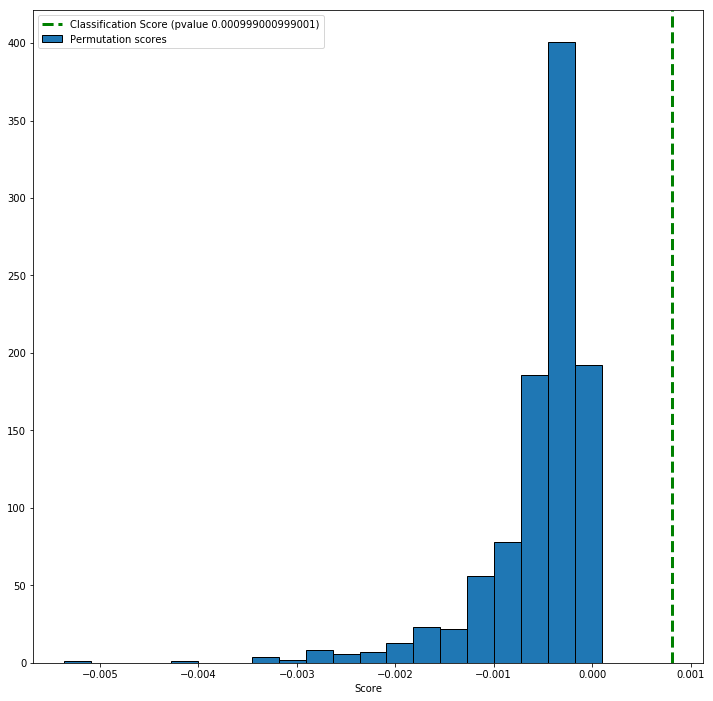

In [96]:
plt.figure(figsize=(12,12))
plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')
plt.show()

###### Permutation test ######

The permutation test has been performed using 1000 permutations.

p - value :0.00099

p value is the number of( percentage of ) runs for which the score btained is greater than the classification score.
This is to evaluate the significance of the classification score with permutations.


#### SUMMARY ####

Two models were used to predict the log errors

1. Linear Regression

----Best score of linear rergression----
Mean Squared Error : 0.01984
score by kaggle : 0.065
Rank : 2758

The mean squared error from home work 2 where we didnot use any external data was : 0.028
This error was reduced further after adding the external data i.e, crime data. The new mean squared error : 0.01984.
We can see that the model performed better than the previous iteration.
But the kaggle rank did not improve much even though the mean squared error was reduce.

2. Random Forests

----Best score of random forest regressor----
Mean Squared Error : 0.0229
Score by kaggle : 0.088

The random forest regression did not perform better than linear regression.

We also tried using k nearerst neighbours . But this failed beacuase of memory error.

Out of all the terations with different models, we found that linear regression performed well with aminimum mean squared error.

